In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Libraries Successfully Imported!")

Libraries Successfully Imported!


In [2]:
import os
import glob

path = 'C:/Users/user/Desktop/xg-data-analysis/datasets/cleanedAdvanced/'
extension = 'csv'
os.chdir(path)
result = glob.glob('*-miscell*-cleaned.{}'.format(extension))
print(result)
print(len(result))

['brighton-miscell1718-cleaned.csv', 'brighton-miscell1819-cleaned.csv', 'huddersfield-miscell1718-cleaned.csv', 'huddersfield-miscell1819-cleaned.csv', 'leeds-miscell2021-cleaned.csv', 'leeds-miscell2122-cleaned.csv', 'newcastle-miscell1718-cleaned.csv', 'newcastle-miscell1819-cleaned.csv', 'sheffutd-miscell1920-cleaned.csv', 'sheffutd-miscell2021-cleaned.csv', 'villa-miscell1920-cleaned.csv', 'villa-miscell2021-cleaned.csv', 'wolves-miscell1819-cleaned.csv', 'wolves-miscell1920-cleaned.csv']
14


In [3]:
churn = []
for index, val in enumerate(result):
    csvfile = pd.read_csv(val, encoding = 'iso-8859-1')
    #print(result[index])
    #print(csvfile)
    csvfile = csvfile.sort_values(by = ['90s'], ascending=False)
    csvfile = csvfile[['Player']].head(15)
    vals = csvfile['Player'].tolist()
    churn.append(vals)

In [4]:
diff_seasons = []
for index in range(0, len(churn), 2):
    l1 = churn[index]
    l2 = churn[index + 1]
    result = [element for element in l1 if element in l2]
    diff_seasons.append(len(result))

In [5]:
diff_seasons

[11, 10, 12, 8, 10, 9, 13]

In [6]:
churn_df = pd.DataFrame()
teams = ['Brighton', 'Huddersfield',  'Leeds United', 'Newcastle United',
         'Sheffield United','Aston Villa', 'Wolves']
churn_df['Club'] = teams
churn_df['SquadChurn'] = diff_seasons

In [7]:
churn_df

,Club,SquadChurn
0,Brighton,11
1,Huddersfield,10
2,Leeds United,12
3,Newcastle United,8
4,Sheffield United,10
5,Aston Villa,9
6,Wolves,13


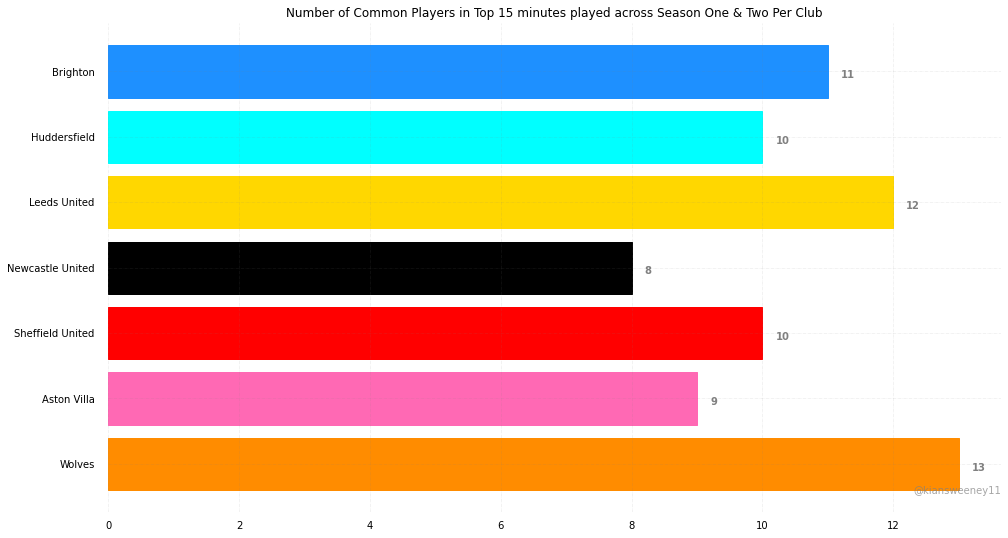

In [19]:
# Figure Size
fig, ax = plt.subplots(figsize = (16, 9))
 
# Horizontal Bar Plot
ax.barh(churn_df['Club'], churn_df['SquadChurn'])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

for color, bar in zip(['dodgerblue','aqua','gold', 'black', 'red', 'hotpink', 'darkorange'], ax.patches):
    bar.set_color(color)
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
ax.set_title('Number of Common Players in Top 15 minutes played across Season One & Two Per Club',
             loc ='center', )
 
# Add Text watermark
fig.text(0.9, 0.15, '@kiansweeney11', fontsize = 10,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
path = 'C:/Users/user/Desktop/xg-data-analysis/images'
os.chdir(path)
plt.savefig("churn.png")
plt.show()